文章转自微信公众号：萝卜大杂烩 作者：周萝卜
[查看原文请点击](https://mp.weixin.qq.com/s?__biz=MzU5NDcyOTg4MA==&mid=2247485145&idx=1&sn=59316568470821822b7f336c131be1cb&chksm=fe7d882ec90a0138ab84fa39e83af43a506f3266f15552ebf99d939448aa30b60d61dce2c5e1&mpshare=1&scene=1&srcid=07153oB1cWrh4O9QPOoRmre5&sharer_sharetime=1594793717194&sharer_shareid=79849f3a9438a070c3db3cc2e1520499&version=3.0.25.2103&platform=win&rd2werd=1#wechat_redirect)

偶然之间，发现了一个网站，title 是世界银行，很高级的样子，可以下载很多有趣的数据，这对于我们练手数据分析及可视化真的是太好的资源了，不多说，戳下面的链接可以火箭直达哦！

https://data.worldbank.org/

我从该网站上下载了世界各国历年的 GDP 总值和增长率数据，下面就摩拳擦掌，一探 GDP 的世界！

In [74]:
import pandas as pd
import pdb

In [75]:
from pyecharts import options as opts
from pyecharts.charts import Pie, Bar, Map, Geo, Liquid, Line

gdp = pd.read_csv('GDP-data/GDP_data.csv')
# pdb.set_trace()
#设置断点
country = pd.read_csv('GDP-data/Country_data.csv')

# 各个收入等级分析
## 各个收入等级分布
首先我们先来看下世界各国分布在不同收入等级的情况

In [76]:
country_data = country.dropna(subset=['Income_Group'])
rank_cuntry = country_data.groupby('Income_Group').size()
# 各个收入等级分布
pie = Pie()
pie.add("", [list(z) for z in zip(rank_cuntry.index.tolist(), rank_cuntry.values.tolist())],
        radius=["30%", "75%"], center=["45%", "50%"], rosetype="radius",
        )
pie.set_global_opts(title_opts=opts.TitleOpts(title="各个国家收入等级分布"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}, {d}%"))
pie.render_notebook()


可以看到，处于“高等收入”和“低收入”的国家比例差距还是很大的，在二十一世纪的今天，还有太多的人过着食不果腹、衣不保暖的生活。

下面我们再具体看下不同收入等级中各个国家具体的 GDP 

## 高收入国家
首先是高收入国家 top10 的 GDP 总量

我们首先拿到高等收入的国家信息，再与 gdp 信息数据合并，最后得到 top10 数据

In [77]:
high = country_data[country_data['Income_Group'] == '高收入国家']

In [78]:
# 高收入国家2018年的GDP
high_gdp = pd.merge(high, gdp, how='inner')
high_gdp['2018'] = high_gdp['2018'].apply(lambda x: x/1000000000000)
high_gdp_top10 = high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]

In [79]:
bar = Bar()
bar.add_xaxis(high_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", high_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="高收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

可以看到，美国是一骑绝尘，排在后面的小弟们，总量加一起也没法和美国相提并论。而在前十名当中，几乎清一色的欧美发达国家。

我们再把榜单扩展到 top20，能看到，欧洲国家还是居多的，而中东的两个土豪也成功上榜了。

In [80]:
high_gdp_top20 = high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

bar = Bar()
bar.add_xaxis(high_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", high_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="高收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

最后再来看下美国占据全世界 GDP 总量的百分比情况

In [81]:
world_gdp = 85.8
def liquid_base(country, gdp) -> Liquid:
    c = (
        Liquid()
        .add("lq", [gdp/world_gdp])
        .set_global_opts(title_opts=opts.TitleOpts(title="%s GDP 总量占比世界" % country))
    )
    return c

In [82]:
liquid_base("美国", 20.4941).render_notebook()

看图不说话。

## 中等收入国家

**接下来看看中等收入国家的 top10 情况**

In [83]:
# 中高等收入国家
mid_high = country_data[country_data['Income_Group'] == '中高等收入国家']
mid_high_gdp = pd.merge(mid_high, gdp, how='inner')
mid_high_gdp['2018'] = mid_high_gdp['2018'].apply(lambda x: x/1000000000000)
mid_high_gdp_top10 = mid_high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
mid_high_gdp_top20 = mid_high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [84]:
bar = Bar()
bar.add_xaxis(mid_high_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", mid_high_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中高等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

基本上都是发展中大国，其中还不乏南非、阿根廷等即将成为发达国家的选手。而我国则以13.6万亿的总量，成为美国之后另一个巨无霸般的存在。

**来看看中美两个总体上占据世界 GDP 的比例情况**

In [85]:
liquid_base("中美", 34.1022).render_notebook()

毫无疑问，这两个 GDP 总量占去世界 GDP 总量40%的国家，绝对是世界经济的命脉，相互合作，携手共赢才是世界经济的未来！

**再来看下 top20 的情况**

In [86]:
bar = Bar()
bar.add_xaxis(mid_high_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", mid_high_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中高等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

## 中低等收入国家

下面就是中低等收入的国家了，还是有很多熟悉的面孔啊

In [87]:
# 中低等收入国家
mid_low = country_data[country_data['Income_Group'] == '中低等收入国家']
mid_low_gdp = pd.merge(mid_low, gdp, how='inner')
mid_low_gdp['2018'] = mid_low_gdp['2018'].apply(lambda x: x/1000000000000)
mid_low_gdp_top10 = mid_low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
mid_low_gdp_top20 = mid_low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [88]:
bar = Bar()
bar.add_xaxis(mid_low_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", mid_low_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中低等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

在这个级别当中，亚洲国家占据了大多数，但是 GDP 的总量却不是很低，尤其是印度，有2.7万亿的数量。这也能反映出，亚洲作为世界上人口最多的大洲，要走向发达国家的行列，还是任重道远啊！

**top20 情况**

In [89]:
bar = Bar()
bar.add_xaxis(mid_low_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", mid_low_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中低等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

## 低收入国家

最后就是低收入国家了，可以看到，在这些国家中，要不就是战乱频仍的国度，要不就是资源匮乏的小国，他们的经济建设之路还很漫长呢。

In [90]:
# 低等收入国家
low = country_data[country_data['Income_Group'] == '低收入国家']
low_gdp = pd.merge(low, gdp, how='inner')
low_gdp['2018'] = low_gdp['2018'].apply(lambda x: x/1000000000000)
low_gdp_top10 = low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
low_gdp_top20 = low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [91]:
bar = Bar()
bar.add_xaxis(low_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", low_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="低等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

**top20 的情况**

In [92]:
bar = Bar()
bar.add_xaxis(low_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", low_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="低等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

# GDP 总体排行
## 2018年 GDP 排行





In [93]:
country_gdp = pd.merge(country_data, gdp, how='inner')
#country_gdp

In [94]:
country_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:60]

,Country Name,Country Code,2018
202,美国,USA,2.049410e+13
36,中国,CHN,1.360815e+13
97,日本,JPN,4.970916e+12
50,德国,DEU,3.996759e+12
68,英国,GBR,2.825208e+12
64,法国,FRA,2.777535e+12
89,印度,IND,2.726323e+12
94,意大利,ITA,2.073902e+12
26,巴西,BRA,1.868626e+12
32,加拿大,CAN,1.712510e+12


In [95]:
# 查看倒数排名
#country_gdp.dropna(subset=['2018'])[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[-20:]

In [96]:
# GDP转换成万亿单位
for i in range(1960, 2019):
    country_gdp[str(i)] = country_gdp[str(i)].apply(lambda x: x/1000000000000)
#country_gdp

先来看看2018年 GDP 总体排行的 top10 吧

In [97]:
# 2018年GDP前十名
country_gdp_top10 = country_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
bar = Bar()
bar.add_xaxis(country_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", country_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

可以看到，除了欧美诸强之外，中国、印度和巴西也纷纷上榜，发展中大国的实力不容小觑啊。

那么再来看看 GDP 总量倒数的10个国家呢

In [98]:
# top20 国家历年GDP
country_gdp_top20 = country_gdp.drop(columns=['Region', 'Income_Group', 'Unnamed: 4', 'Indicator Name', 'Indicator Code', '2019', 'Unnamed: 64']).sort_values(by='2018', ascending=False)[:20]
# GDP转换成万亿单位
for i in range(1960, 2019):
    country_gdp_top20[str(i)] = country_gdp_top20[str(i)].apply(lambda x: x*1000000000000)

country_gdp_top20

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
202,美国,USA,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.049410e+13
36,中国,CHN,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,...,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
97,日本,JPN,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056281e+11,1.237819e+11,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.970916e+12
50,德国,DEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.898727e+12,3.381389e+12,3.495163e+12,3.693204e+12,3.996759e+12
68,英国,GBR,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.005958e+11,1.070907e+11,1.111854e+11,...,2.394786e+12,2.452900e+12,2.634896e+12,2.676605e+12,2.753565e+12,3.034729e+12,2.896421e+12,2.659239e+12,2.637866e+12,2.825208e+12
64,法国,FRA,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.021606e+11,1.105975e+11,1.194661e+11,...,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.471286e+12,2.586285e+12,2.777535e+12
89,印度,IND,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955486e+10,4.586546e+10,5.013494e+10,...,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.290432e+12,2.652551e+12,2.726323e+12
94,意大利,ITA,4.038529e+10,4.484276e+10,5.038389e+10,5.771074e+10,6.317542e+10,6.797815e+10,7.365487e+10,8.113312e+10,...,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832273e+12,1.869202e+12,1.946570e+12,2.073902e+12
26,巴西,BRA,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,...,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472806e+12,2.455994e+12,1.802214e+12,1.796275e+12,2.053595e+12,1.868626e+12
32,加拿大,CAN,NaN,4.155599e+10,4.286809e+10,4.571315e+10,5.012664e+10,5.534224e+10,6.201517e+10,6.666493e+10,...,1.371153e+12,1.613543e+12,1.789141e+12,1.823967e+12,1.842018e+12,1.801480e+12,1.552900e+12,1.526706e+12,1.646867e+12,1.712510e+12


In [99]:
country_list = []
year_list = []
value_list = []
type_list = []
c_list = ['美国', '中国', '日本', '德国', '英国', '法国', '印度', '意大利', '巴西', '加拿大', '俄罗斯联邦', '大韩民国', '澳大利亚', 
          '西班牙', '墨西哥', '印度尼西亚', '荷兰', '沙特阿拉伯', '土耳其', '瑞士']
for c in c_list:
    for i in range(1960, 2019):
        country_list.append(c)
        type_list.append(country_gdp_top20[country_gdp_top20['Country Name'] == c]['Country Code'].values.tolist()[0])
        value_list.append(country_gdp_top20[country_gdp_top20['Country Name'] == c][str(i)].values.tolist()[0])
        year_list.append(str(i))

#print(len(value_list))
#print(len(country_list))
d = {'name': country_list, 'type': type_list, 'value': value_list, 'date': year_list}
pd.DataFrame(d).to_csv('auto_gdp.csv', index=0)

In [100]:
# 2018年GDP后十名
country_gdp_bottom10 = country_gdp.dropna(subset=['2018'])[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[-10:]

In [101]:
bar = Bar()
bar.add_xaxis(country_gdp_bottom10['Country Name'].values.tolist())
bar.add_yaxis("", country_gdp_bottom10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP bottom10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()


### 历年GDP倒数分析

In [102]:
df_tuwalu = country_gdp[country_gdp['Country Name']=='图瓦卢']

df_naolu = country_gdp[country_gdp['Country Name']=='瑙魯']

df_jilibasi = country_gdp[country_gdp['Country Name']=='基里巴斯']

df_mashaoerqundao = country_gdp[country_gdp['Country Name']=='马绍尔群岛']
    
df_palao = country_gdp[country_gdp['Country Name']=='帕劳']
year_str = [str(i) for i in range(1960, 2019)]

In [103]:
tuwalu_gdp = df_tuwalu[year_str].values.tolist()[0]
naolu_gdp = df_naolu[year_str].values.tolist()[0]
jilibasi_gdp = df_jilibasi[year_str].values.tolist()[0]
mashaoerqundao_gdp = df_mashaoerqundao[year_str].values.tolist()[0]
palao_gdp = df_palao[year_str].values.tolist()[0]


### 历年GDP正数分析

In [104]:
df_china = country_gdp[country_gdp['Country Name']=='中国']

df_usa = country_gdp[country_gdp['Country Name']=='美国']

df_jpn = country_gdp[country_gdp['Country Name']=='日本']

df_de = country_gdp[country_gdp['Country Name']=='德国']

df_uk = country_gdp[country_gdp['Country Name']=='英国']

In [105]:
year_str = [str(i) for i in range(1960, 2019)]

china_gdp = df_china[year_str].values.tolist()[0]
usa_gdp = df_usa[year_str].values.tolist()[0]
jpn_gdp = df_jpn[year_str].values.tolist()[0]
de_gdp = df_de[year_str].values.tolist()[0]
uk_gdp = df_uk[year_str].values.tolist()[0]


## 历年各国 GDP 走势
我们先来看一下 GDP 总量排行前五的国家，历年 GDP 总量的走势情况


In [106]:
from pyecharts.charts import Scatter

def scatter_base(choose, values, country) -> Scatter:
    c = (
        Scatter()
        .add_xaxis(choose)
        .add_yaxis("%s历年GDP" % country, values)
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        # datazoom_opts=opts.DataZoomOpts(),
                         yaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            )
                        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    return c


**中国**

In [107]:
scatter_base(year_str, china_gdp, '中国').render_notebook()

**美国**

In [108]:
scatter_base(year_str, usa_gdp, '美国').render_notebook()

**日本**

In [109]:
scatter_base(year_str, jpn_gdp, '日本').render_notebook()

**德国**

In [110]:
scatter_base(year_str, de_gdp, '德国').render_notebook()

**英国**

In [111]:
scatter_base(year_str, uk_gdp, '英国').render_notebook()

**图瓦卢**

In [112]:
scatter_base(year_str, tuwalu_gdp, '图瓦卢').render_notebook()

**瑙鲁**

In [113]:
scatter_base(year_str, naolu_gdp, '瑙魯').render_notebook()

基里帕斯

In [114]:
scatter_base(year_str, jilibasi_gdp, '基里帕斯').render_notebook()

可以看出，除了中美两国外，其他的国家 GDP 总量都出现过大幅度的波动情况，而持续增长的中美两国，则一骑绝尘，遥遥领先于世界了！

# 世界GDP地图
下面我们通过世界地图的方式来看看 GDP 的分布情况

我们先进行数据处理，把国家代码和 GDP 数据相结合

In [115]:
country_code = pd.read_json('GDP-data/countries.json')

In [116]:
country_code.rename(columns={'iso3': 'Country Code'}, inplace=True)

In [117]:
conutry_code_name = country_code[['name', 'Country Code']]

In [118]:
country_gdp_code = pd.merge(country_gdp, conutry_code_name, on='Country Code', how='inner')

In [119]:
country_gdp_code[country_gdp_code['Country Name'] == '美国']

,Country Name,Country Code,Region,Income_Group,Unnamed: 4,Indicator Name,Indicator Code,1960,1961,1962,...,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,name
199,美国,USA,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.5433,0.5633,0.6051,...,16.197007,16.784849,17.521747,18.219298,18.707188,19.485394,20.4941,NaN,NaN,United States


In [120]:
map_country = country_gdp_code['name'].values.tolist()
map_country_gdp = country_gdp_code['2018'].values.tolist()
print(len(map_country), len(map_country_gdp))

212 212


由此，我们可以做出一张 GDP 总量的地图分布图

In [121]:
def map_world() -> Map:
    c = (
        Map()
        .add("GDP总量", [list(z) for z in zip(map_country, map_country_gdp)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="GDP总量"),
            visualmap_opts=opts.VisualMapOpts(max_=22, is_piecewise=True),
        )
    )
    return c

In [122]:
map_world().render_notebook()

在这张 GDP 地图中，可以清晰的看出，美国和中国地盘大，颜色深，非常明显，隐隐有东西两强的趋势。

我们再去掉中美两国，看看剩余国家的 GDP 情况

In [123]:
def map_world() -> Map:
    c = (
        Map()
        .add("GDP总量", [list(z) for z in zip(map_country, map_country_gdp)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="GDP总量"),
            visualmap_opts=opts.VisualMapOpts(max_=5, is_piecewise=True),
        )
    )
    return c
map_world().render_notebook()

在这张图中，可以看到日本、西欧和印度是一个级别的存在，而俄罗斯、加拿大、澳大利亚和巴西等是另外的一组，其余大部分的第三世界国家，则是第三组！
# GDP 增长率
下面我们再来看看 GDP 增长率的情况，有的国家 GDP 本来总量就高，而且增长率还非常不错，那么未来的经济形式一定前途无量；而有的国家则举步维艰，低 GDP 总量再加上惨淡的增长率，未来的日子很难啊。

In [124]:
# 增长率分析
growth = pd.read_csv('GDP-data/growth_Data.csv')

In [125]:
growth_data = pd.merge(country_data, growth, how='inner')

**增长率 top10**

In [126]:
country_growth_top10 = growth_data[['Country Name', 'Country Code', '2018 [YR2018]']].sort_values(by='2018 [YR2018]', ascending=False)[:10]

In [127]:
bar = Bar()
bar.add_xaxis(country_growth_top10['Country Name'].values.tolist())
bar.add_yaxis("", country_growth_top10['2018 [YR2018]'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP增长率top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比")
            ),)
bar.render_notebook()

在这份增长率 top10 榜单中，大部分的国家都是 GDP 较低的国家，这还是说明低 GDP 的增长空间是更加大的。

而印度则不一样，它本身的 GDP 总量已经非常高了，竟然还有这么高的 GDP 增长率，其未来的经济一片大好啊！


**增长率 bottom10**


再来看下增长率排名垫底的10个国家，这就比较闹心了

In [128]:
country_growth_bottom10 = growth_data[['Country Name', 'Country Code', '2018 [YR2018]']].sort_values(by='2018 [YR2018]', ascending=False)[-10:]

In [129]:
bar = Bar()
bar.add_xaxis(country_growth_bottom10['Country Name'].values.tolist())
bar.add_yaxis("", country_growth_bottom10['2018 [YR2018]'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP增长率bottom10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比")
            ),)
bar.render_notebook()

GDP 负增长就是说经济在后退啊，如何振兴经济应该是这些国家的首要任务了！
# 中美印对比

In [130]:
growth_china = growth_data[growth_data['Country Name']=='中国']
growth_usa = growth_data[growth_data['Country Name']=='美国']
growth_ind = growth_data[growth_data['Country Name']=='印度']

In [131]:
def scatter_growth(choose, values, country) -> Scatter:
    c = (
        Scatter()
        .add_xaxis(choose)
        .add_yaxis("%s历年GDP增长率" % country, values)
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        yaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比"),
                        ),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)),
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    return c

**中国历年GDP增长率**

In [132]:
year_str_new = [str(i)+ " [YR%s]" % i for i in range(2010, 2019)]
year_str_new1 = [str(i) for i in range(2010, 2019)]

china_growth = growth_china[year_str_new].values.tolist()[0]
china_growth = list(map(float, china_growth))
print(china_growth)
scatter_growth(year_str_new1, china_growth, '中国').render_notebook()

[10.6361404632299, 9.55091409001014, 7.8596274932851, 7.76861528412806, 7.29951892117124, 6.90531667019702, 6.73667525262536, 6.75700761091511, 6.60000000000001]


**美国历年GDP增长率**

In [133]:
usa_growth = growth_usa[year_str_new].values.tolist()[0]
print(usa_growth)
scatter_growth(year_str_new1, usa_growth, '美国').render_notebook()

['2.56376655847168', '1.55083550620974', '2.24954585216848', '1.8420810704697', '2.4519730360895', '2.88091046576689', '1.56721516988685', '2.21701033035224', '2.8569878160516']


**印度历年增长率**

In [134]:
ind_growth = growth_ind[year_str_new].values.tolist()[0]
df_ind = country_gdp[country_gdp['Country Name']=='印度']
ind_gdp = df_ind[year_str].values.tolist()[0]

print(ind_growth)
scatter_growth(year_str_new1, usa_growth, '印度').render_notebook()

['8.49758687599316', '5.24131422481111', '5.45638755166588', '6.38610640094825', '7.41022760508852', '7.99625378571471', '8.16952650547138', '7.16788886086535', '6.98233355585374']


## 中美印增长率对比

In [135]:
def overlap_line_scatter() -> Bar:
    scatter = (
        Scatter()
        .add_xaxis(year_str_new1)
        .add_yaxis("中国历年GDP增长率", china_growth)
        .add_yaxis("美国历年GDP增长率", usa_growth)
        .add_yaxis("印度历年GDP增长率", ind_growth)
        .extend_axis(
            yaxis=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} 万亿"), interval=5
            )
        )
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        yaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比"),
                        ),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)),
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    line = (
        Line()
        .add_xaxis(year_str[-9:])
        .add_yaxis("中国历年 GDP 总量", china_gdp[-9:], yaxis_index=1)
        .add_yaxis("美国历年 GDP 总量", usa_gdp[-9:], yaxis_index=1)
        .add_yaxis("印度历年 GDP 总量", ind_gdp[-9:], yaxis_index=1)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    scatter.overlap(line)
    return scatter

overlap_line_scatter().render_notebook()

In [136]:
country_growth_code = pd.merge(growth_data, conutry_code_name, on='Country Code', how='inner')

在图中可以看出，虽然近些年印度保持着很高的增长率，但是 GDP 总量增长并没有中美两国明显。

而美国的增长率常年在2%和1%之间震荡，好像还蛮有规律的。

对于我国来说，增长率已经从以前恐怖的10%慢慢回落了，但是经济增长的趋势是没法阻挡的！

# 增长率地图

最后还是在世界地图中整体看看 GDP 增长率的分布情况

In [137]:
map_country = country_growth_code['name'].values.tolist()
map_country_gdp = country_growth_code['2018 [YR2018]'].values.tolist()
print(len(map_country), len(map_country_gdp))
def map_world_growth() -> Map:
    c = (
        Map()
        .add("GDP增长率", [list(z) for z in zip(map_country, map_country_gdp)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="GDP增长率"),
            visualmap_opts=opts.VisualMapOpts(max_=10, min_=-5, is_piecewise=True),
        )
    )
    return c

212 212


In [138]:
map_world_growth().render_notebook()

## 中美GDP回归模型

In [139]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm

In [140]:
year = [i for i in range(1960, 2019)]
X = np.array(year)
X = X.reshape(-1, 1)

In [141]:
y = usa_gdp

In [142]:
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(X, y)
# 求预测值y
pred_y = model.predict(X)

In [143]:
p_year = [i for i in range(1960, 2020)]
p_X = np.array(p_year)
p_X = p_X.reshape(-1, 1)
p_pred_y = model.predict(p_X)
p_pred_y

array([ 0.67561513,  0.64550236,  0.63069893,  0.6310778 ,  0.64651146,
        0.67687193,  0.7220308 ,  0.78185916,  0.85622766,  0.94500648,
        1.04806535,  1.16527352,  1.29649978,  1.44161246,  1.60047942,
        1.77296806,  1.9589453 ,  2.15827761,  2.37083099,  2.59647097,
        2.8350626 ,  3.08647047,  3.35055872,  3.62719099,  3.91623047,
        4.21753986,  4.53098142,  4.8564169 ,  5.19370761,  5.54271437,
        5.90329754,  6.27531699,  6.65863212,  7.05310188,  7.4585847 ,
        7.87493857,  8.302021  ,  8.739689  ,  9.18779914,  9.64620748,
       10.11476961, 10.59334065, 11.08177525, 11.57992755, 12.08765123,
       12.60479949, 13.13122504, 13.66678012, 14.21131649, 14.7646854 ,
       15.32673766, 15.89732355, 16.47629291, 17.06349506, 17.65877886,
       18.26199267, 18.87298437, 19.49160136, 20.11769053, 20.75109831])

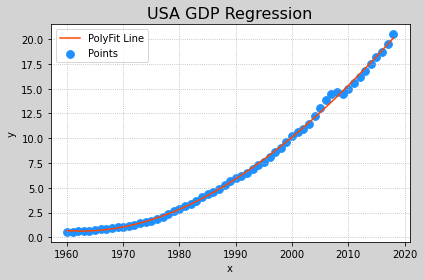

In [144]:
# 绘制多项式回归线
px = np.linspace(X.min(), X.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("美国历年GDP拟合结果", facecolor='lightgray')
mp.title('USA GDP Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(X, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()

In [145]:
# 中国
y = china_gdp
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(X, y)
# 求预测值y
pred_y = model.predict(X)

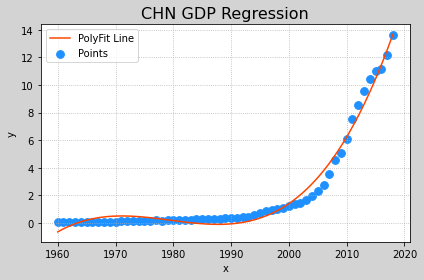

In [146]:
# 绘制多项式回归线
px = np.linspace(X.min(), X.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("中国历年GDP拟合结果", facecolor='lightgray')
mp.title('CHN GDP Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(X, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()